In [1]:
import pandas as pd
import numpy as np

# Applied Statistics:


1.For a given set of values in stats.xls that contains the list of employees, years of experience and their salary write a python script to calculate the mean, mode and median.

2.For the above exercise determine the standard deviation and variance through python scripting.

In [2]:
stats_data = pd.read_excel('/Users/lo310411/Desktop/AIML-Python/stats.xlsx')
stats_data.head()

Emp#  YearsOfExp  Salary in Rs.
0     1          10         126015
1     2           1          12598
2     3           8         100639
3     4          10         125351
4     5           2          25031

In [3]:
stats_data.shape

(25, 3)

In [4]:
stats_data.isnull().sum()

Emp#             0
YearsOfExp       0
Salary in Rs.    0
dtype: int64

In [5]:
#calculation Mean
print(stats_data.mean(skipna=True))

Emp#                13.0
YearsOfExp           6.2
Salary in Rs.    77821.2
dtype: float64


In [6]:
#calculate Median
print(stats_data.median(skipna=True))

Emp#                13.0
YearsOfExp           7.0
Salary in Rs.    87654.0
dtype: float64


In [7]:
#calculate Mode
print(stats_data.mode()[0:1])

   Emp#  YearsOfExp  Salary in Rs.
0     1        10.0       100639.0


In [8]:
#calculate Standard Deviation
print(stats_data.std())

Emp#                 7.359801
YearsOfExp           3.175426
Salary in Rs.    39847.615281
dtype: float64


In [9]:
#calculate Variance
print(stats_data.var())

Emp#             5.416667e+01
YearsOfExp       1.008333e+01
Salary in Rs.    1.587832e+09
dtype: float64


# B.Natural Language Processing :


Ex 1. Write a python script that reads the data_in.csv from every cell in column
labeled as comment and perform sentence tokenization and redirects in to
column of data_out.csv. Perform the NE Chunking on these sentences.

Ex 2. Write a python script that reads the data_in.csv from every cell in column
labeled as comment and perform word tokenization and redirects in to column of
data_out.csv

Ex3. From an input file data.txt it is required to identify the POS-Tagging and
display it on tree structure.

Ex 4. For a given text file exclude the stop words and perform the Stemming &
lemmatization and compare the results.

Ex 5. Create a small dictionary file with required set of words with weightage
attached to it with positive and negative numbers. Create a python script that
analyzes the given text file and classify it as negative or positive sentiment.

In [10]:
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import csv

# EX 1:

Write a python script that reads the data_in.csv from every cell in column labeled as comment and perform sentence tokenization and redirects in to column of data_out.csv. Perform the NE Chunking on these sentences.

In [11]:
dataIn = pd.read_csv("/Users/lo310411/Desktop/AIML-Python/data_in.csv",header=0)


In [12]:
dataIn["Comment"]

0    "Hello there, how are you? Weather is awesome....
1    "Hello Mr. Raja, how are you? Weather is aweso...
2    "Hello Mr. Raja, how are you. Weather is bad. ...
3    "NLP is great technique. It is nice to learn t...
4    "AI is making difference in this world now.  I...
Name: Comment, dtype: object

In [13]:
with open("data_out.csv","w") as outfile:
    mywriter1 = csv.DictWriter(outfile,fieldnames=["Comment"])
    mywriter1.writeheader()
    mywriter= csv.writer(outfile)
    mywriter.writerows([[sent_tokenize(item)] for item in dataIn["Comment"]])

In [14]:
file = open("data_out.csv",'r+')
file.readlines()

['Comment\n',
 '"[\'""Hello there, how are you?\', \'Weather is awesome.\', \'Its raining here now.""\']"\n',
 '"[\'""Hello Mr. Raja, how are you?\', \'Weather is awesome.\', \'Its raining here now.""\']"\n',
 '"[\'""Hello Mr. Raja, how are you.\', \'Weather is bad.\', \'Its heavily raining here now.""\']"\n',
 '"[\'""NLP is great technique.\', \'It is nice to learn this technique.""\']"\n',
 '"[\'""AI is making difference in this world now.\', \'It would be helpful for betterment of human life.\', \'We need to make advantage of that.""\']"\n']

In [24]:
d=pd.read_csv("data_out.csv")
d

Comment
0  ['``', 'Hello', 'there', ',', 'how', 'are', 'y...
1  ['``', 'Hello', 'Mr.', 'Raja', ',', 'how', 'ar...
2  ['``', 'Hello', 'Mr.', 'Raja', ',', 'how', 'ar...
3  ['``', 'NLP', 'is', 'great', 'technique', '.',...
4  ['``', 'AI', 'is', 'making', 'difference', 'in...

In [23]:
# NE Chunking on these sentences.
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

for sent in dataIn['Comment']:
    print(ne_chunk(pos_tag(word_tokenize(sent))))

(S
  ``/``
  Hello/NNP
  there/RB
  ,/,
  how/WRB
  are/VBP
  you/PRP
  ?/.
  Weather/''
  is/VBZ
  awesome/JJ
  ./.
  Its/PRP$
  raining/VBG
  here/RB
  now/RB
  ./.
  ''/'')
(S
  ``/``
  (PERSON Hello/NNP Mr./NNP Raja/NNP)
  ,/,
  how/WRB
  are/VBP
  you/PRP
  ?/.
  Weather/''
  is/VBZ
  awesome/JJ
  ./.
  Its/PRP$
  raining/VBG
  here/RB
  now/RB
  ./.
  ''/'')
(S
  ``/``
  (PERSON Hello/NNP Mr./NNP Raja/NNP)
  ,/,
  how/WRB
  are/VBP
  you/PRP
  ./.
  Weather/CC
  is/VBZ
  bad/JJ
  ./.
  Its/PRP$
  heavily/RB
  raining/VBG
  here/RB
  now/RB
  ./.
  ''/'')
(S
  ``/``
  (ORGANIZATION NLP/NNP)
  is/VBZ
  great/JJ
  technique/NN
  ./.
  It/PRP
  is/VBZ
  nice/JJ
  to/TO
  learn/VB
  this/DT
  technique/NN
  ./.
  ''/'')
(S
  ``/``
  AI/NNP
  is/VBZ
  making/VBG
  difference/NN
  in/IN
  this/DT
  world/NN
  now/RB
  ./.
  It/PRP
  would/MD
  be/VB
  helpful/JJ
  for/IN
  betterment/NN
  of/IN
  human/JJ
  life/NN
  ./.
  We/PRP
  need/VBP
  to/TO
  make/VB
  advantage/NN
  of/IN
  tha

# EX 2:

    Write a python script that reads the data_in.csv from every cell in column labeled as comment and perform word tokenization and redirects in to column of data_out.csv

In [16]:
dataIn

Comment
0  "Hello there, how are you? Weather is awesome....
1  "Hello Mr. Raja, how are you? Weather is aweso...
2  "Hello Mr. Raja, how are you. Weather is bad. ...
3  "NLP is great technique. It is nice to learn t...
4  "AI is making difference in this world now.  I...

In [17]:
with open("data_out.csv","w") as outfile:
    mywriter1 = csv.DictWriter(outfile,fieldnames=["Comment"])
    mywriter1.writeheader()
    mywriter= csv.writer(outfile)
    mywriter.writerows([[word_tokenize(item)] for item in dataIn["Comment"]])

In [18]:
d = pd.read_csv("data_out.csv")
d['Comment'][0]

'[\'``\', \'Hello\', \'there\', \',\', \'how\', \'are\', \'you\', \'?\', \'Weather\', \'is\', \'awesome\', \'.\', \'Its\', \'raining\', \'here\', \'now\', \'.\', "\'\'"]'

d

# EX 3:

From an input file data.txt it is required to identify the POS-Tagging and
display it on tree structure.

In [19]:
data = pd.read_csv("/Users/lo310411/Desktop/AIML-Python/NLPdataEx3_4-data_in.txt", sep='\n',header=None)

In [20]:
data.head()

0
0  Hello there, how are you? Weather is awesome. ...
1  Hello Mr. Raja, how are you? Weather is awesom...
2  Hello Mr. Raja, how are you. Weather is bad. I...
3  NLP is great technique. It is nice to learn th...
4  AI is making difference in this world now.  It...

In [25]:
#POS-Parts od speach Tagging
pos_words=[]
for line in data[0]:
    pos_words=ne_chunk(pos_tag(word_tokenize(line)))

In [28]:
#Displaying the tree structure
pos_words.draw()

# EX 4: 
    Exclude the stop words and perform the stemming & lemmmatization

In [26]:
#Excluding the stop words
stop_words = set(stopwords.words('english'))

exclude_stopwords=[]
for line in data[0]:
    for word in word_tokenize(line):
        if word in stop_words:
            continue
        elif word not in stop_words:
            exclude_stopwords.append(word)

In [27]:
#Performing the Stemming operation
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem_data = []

for word in exclude_stopwords:
    stem_data.append(ps.stem(word))

In [28]:
#Performing the Lemmatizing operation
from nltk import stem 
word_lemat = stem.WordNetLemmatizer()

lemmat_data = []


for word in exclude_stopwords:
    lemmat_data.append(word_lemat.lemmatize(word))

In [29]:
#comparing the results

for (word1,word2) in zip(stem_data,lemmat_data):
    print("stemming--->{} | Lemmatinzing-->{}".format(word1,word2))
    print()

stemming--->hello | Lemmatinzing-->Hello

stemming--->, | Lemmatinzing-->,

stemming--->? | Lemmatinzing-->?

stemming--->weather | Lemmatinzing-->Weather

stemming--->awesom | Lemmatinzing-->awesome

stemming--->. | Lemmatinzing-->.

stemming--->it | Lemmatinzing-->Its

stemming--->rain | Lemmatinzing-->raining

stemming--->. | Lemmatinzing-->.

stemming--->hello | Lemmatinzing-->Hello

stemming--->mr. | Lemmatinzing-->Mr.

stemming--->raja | Lemmatinzing-->Raja

stemming--->, | Lemmatinzing-->,

stemming--->? | Lemmatinzing-->?

stemming--->weather | Lemmatinzing-->Weather

stemming--->awesom | Lemmatinzing-->awesome

stemming--->. | Lemmatinzing-->.

stemming--->it | Lemmatinzing-->Its

stemming--->rain | Lemmatinzing-->raining

stemming--->. | Lemmatinzing-->.

stemming--->hello | Lemmatinzing-->Hello

stemming--->mr. | Lemmatinzing-->Mr.

stemming--->raja | Lemmatinzing-->Raja

stemming--->, | Lemmatinzing-->,

stemming--->. | Lemmatinzing-->.

stemming--->weather | Lemmatinzing--

# EX 5 : 
Create a small dictionary file with required set of words with weightage attached to it with positive and negative numbers. Create a python script that analyzes the given text file and classify it as negative or positive sentiment.Sentiment Analysis

In [30]:
file = open('/Users/lo310411/Desktop/AIML-Python/NLPdataEx5data_senti_analyze.txt','r')
file_data = file.readlines()

tokenized_words =[]

weightage_dict = {}

stop_words = set(stopwords.words('english'))

In [35]:
for line in file_data:
    for word in word_tokenize(line):
        if word not in stop_words:
            tokenized_words.append(word)
            
tokenized_words

['Rose',
 'beautiful',
 '.',
 'Place',
 'nasty',
 'stay',
 '.',
 'This',
 'beauty',
 'technique',
 '.',
 'Concept',
 'explained',
 'beautifully',
 'book',
 '.',
 'He',
 'annoyed',
 '.',
 'Its',
 'supreme',
 'place',
 'stay',
 '.',
 'I',
 'hate',
 'place',
 '.',
 'Dont',
 'annoy',
 'customer',
 '.',
 'He',
 'given',
 'nasty',
 'comments',
 'stay',
 '.',
 'Dessert',
 'awesome',
 '.',
 'Your',
 'gift',
 'wonderful',
 '.']

In [31]:
df = pd.read_csv('/Users/lo310411/Desktop/AIML-Python/NLPdataEx5dict.txt',header=None,sep='=')
df

0                                                  1
0  neg_words  ["hate","hatred","annoyed","annoy","annoyingly...
1  pos_words  ["nice","excellent","good","wonderful","best",...

In [32]:
df.columns = ('Sentiment','words')
df

Sentiment                                              words
0  neg_words  ["hate","hatred","annoyed","annoy","annoyingly...
1  pos_words  ["nice","excellent","good","wonderful","best",...

In [33]:
pos_wd_cnt = 0
neg_wd_cnt = 0

for word in tokenized_words:
    if word in df['words'][1]:
        pos_wd_cnt += 1
        weightage_dict[word] = 1
        
    elif word in df['words'][0]:
        neg_wd_cnt +=1
        weightage_dict[word] = 0
        
weightage_dict

{}

In [34]:
for line in file_data:
    for word in word_tokenize(line):
        try:
            if weightage_dict[word] == 1:
                print("{}--> Positive Sentiment ".format(line))
                break
            elif weightage_dict[word] == 0: 
                print("{}--> Negative Sentiment ".format(line))
                break
        except KeyError:
                continue

In [40]:
file_data

['Rose is beautiful.\n',
 'Place is nasty to stay.\n',
 'This is the beauty of this technique.\n',
 'Concept is explained beautifully in this book.\n',
 'He annoyed me.\n',
 'Its the supreme place to stay.\n',
 'I hate this place.\n',
 'Dont annoy the customer.\n',
 'He has given nasty comments about his stay.\n',
 'Dessert is awesome.\n',
 'Your gift is wonderful.']

# C. Machine Learning :
    ML Linear Regression assignments
    Univariate Regression

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.stats import zscore

In [36]:
car_data = pd.read_csv('/Users/lo310411/Desktop/AIML-Python/car_mpg.csv')

In [37]:
car_data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [38]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [39]:
car_data.isnull().sum()      # DataFrame is clean without any null values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [44]:
# get data

carmodel = car_data.loc[:,['mpg','acceleration']]
carmodel.head()

mpg  acceleration
0  18.0          12.0
1  15.0          11.5
2  18.0          11.0
3  16.0          12.0
4  17.0          10.5

In [45]:
# applying the zscore
carmodel = carmodel.apply(zscore)
carmodel.head()

mpg  acceleration
0 -0.706439     -1.295498
1 -1.090751     -1.477038
2 -0.706439     -1.658577
3 -0.962647     -1.295498
4 -0.834543     -1.840117

In [46]:
# since mpg = m* acceleration +x
x=np.array(carmodel['acceleration'])
y=np.array(carmodel['mpg'])

In [47]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [48]:
x_train.shape

(318,)

In [49]:
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)

In [50]:
linreg = linear_model.LinearRegression()  # Creating the linear regression model object

In [51]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
linreg.coef_          #slope

array([[0.39502072]])

In [54]:
linreg.intercept_

array([0.00168643])

In [55]:
# mpg =  1.11958811 * acceleration + 6.09788841

x_test = x_test.reshape(len(x_test),1)
y_test = y_test.reshape(len(y_test),1)

In [56]:
linreg.score(x_test,y_test)

0.2837692710354306

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt

In [58]:
# making the predictions
y_pred = linreg.predict(x_test)

In [59]:
y_pred[8]

array([0.49390356])

In [60]:
# residues 

mse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
mse

0.7949590075334672

In [61]:
r2_score(y_test,y_pred)     # since the data has more spread the score will be low of 28%

0.2837692710354306

In [62]:
y_test[8]

array([-0.83454267])

In [63]:
x_test[8]

array([1.24605393])

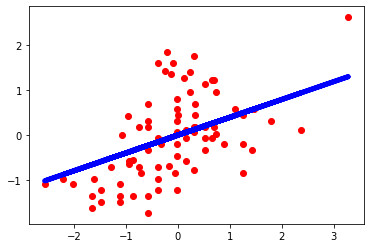

In [64]:
plt.scatter(x_test,y_test,color ='red')
plt.plot(x_test,y_pred,color = 'blue' , linewidth=5)
plt.show()

# Multi-variate Regression

In [65]:
car_data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [66]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [67]:
car_data.replace('?',np.NAN)

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [69]:
# we don't really need car name right now, we call figure it out later if we want
car_data = car_data.drop(['car name'],axis = 1) 

In [71]:
# scalling data 

car_data_clean = car_data[car_data.horsepower != '?']
car_data_clean.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [72]:
car_data_clean.horsepower = car_data_clean.horsepower.astype('float')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
data = car_data_clean.loc[:,['mpg','displacement']]

In [74]:
data = data.apply(zscore)

In [75]:
#defining the Compute MSE
def compute_MSE(points,m,c):
    totalerr = 0
    for i in range(0,len(points)):
        x = points[i,1]
        y = points[i,0]
        totalerr +=(y - (m*x + c))**2

        return (totalerr/float(len(points)))

In [76]:
#defining the step_gradient 
def step_gradient(points,m_curr,c_curr,learning_rate):
    m_grad=0
    c_grad =0
    n = float(len(points))
    for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        m_grad += -(2/n) * (y - (m_curr * x + c_curr)) * x
        c_grad += -(2/n) * (y - (m_curr * x + c_curr))
    m_new = m_curr - (learning_rate * m_grad)
    c_new = c_curr - (learning_rate * c_grad)  
              
    return(m_new,c_new)

In [77]:
def iteration(points,m,c, lrnrt,iteration_num):
    
    for i in range(iteration_num):
        m,c = step_gradient(points,m,c,lrnrt)
    
    return(m,c)

In [78]:
points = np.array(data)

In [79]:
points[0,0]

-0.6986384086952149

In [80]:
##Initialize the hyper parameters
m_ini =0
c_ini = 0
iterations = 1000
learning_rt = 0.001

In [81]:
##call MSE
print('Starting gradient descent at m = {0}, c={1} with MSE = {2}'.format(m_ini,c_ini,compute_MSE(points,m_ini,c_ini)))

Starting gradient descent at m = 0, c=0 with MSE = 0.0012451419033269952


In [82]:
[m,c]=iteration(points,m_ini,c_ini, learning_rt,iterations)

In [83]:
print(m,c)

-0.6963828601440525 1.0199870462135343e-16


In [84]:
## MPG = -0.6963885788271993 * Acceleration + 2.5718576573963156e-16
print('After {0} iterations, m = {1}, c={2} and MSE ={3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 1000 iterations, m = -0.6963828601440525, c=1.0199870462135343e-16 and MSE =6.783711153072622e-06


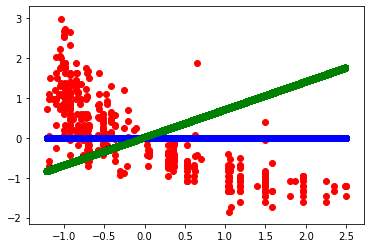

In [86]:
# plotting
for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        plt.scatter(x,y,color='red')
        
        plt.plot(data.displacement,(0*data.displacement + 0),color='blue',linewidth=7)
        plt.plot(data.displacement,(0.6963885788271993*data.displacement + 2.5718576573963156e-16),color='green',linewidth=7)

In [87]:
iterations = 1500
[m,c]=iteration(points,m_ini,c_ini, learning_rt,iterations)


In [88]:
print('After {0} iterations, m = {1}, c={2} and MSE ={3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 1500 iterations, m = -0.7651622709981425, c=1.1048497186583187e-16 and MSE =4.0283592953585545e-05


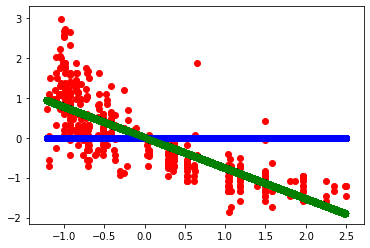

In [90]:
# plotting
for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        plt.scatter(x,y,color='red')
        
        plt.plot(data.displacement,(0*data.displacement + 0),color='blue',linewidth=7)
        plt.plot(data.displacement,(-0.7651685544965373*data.displacement + 2.773905237452022e-16),color='green',linewidth=7)

In [91]:
# Lets change the learning rate
iterations = 1500
learning_rt = 0.01
[m,c]=iteration(points,m_ini,c_ini, learning_rt,iterations)

In [92]:
print('After {0} iterations, m = {1}, c={2} and MSE ={3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 1500 iterations, m = -0.8051269467104022, c=1.1218023038273023e-16 and MSE =7.261540405973091e-05


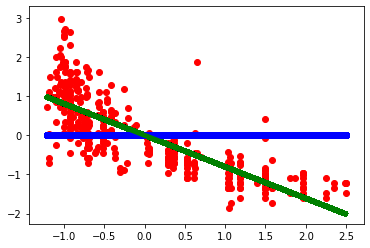

In [94]:
# plotting
for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        plt.scatter(x,y,color='red')
        
        plt.plot(data.displacement,(0*data.displacement + 0),color='blue',linewidth=7)
        plt.plot(data.displacement,(-0.8051335583979728*data.displacement +2.7614629333205763e-16),color='green',linewidth=5)

In [95]:
# change the iterations
iterations = 1000
[m,c]=iteration(points,m_ini,c_ini, learning_rt,iterations)

In [96]:
print('After {0} iterations, m = {1}, c={2} and MSE ={3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 1000 iterations, m = -0.8051269453554555, c=1.2720293568468918e-16 and MSE =7.261540280324968e-05


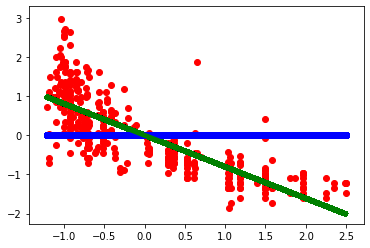

In [97]:
# plotting
for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        plt.scatter(x,y,color='red')
        
        plt.plot(data.displacement,(0*data.displacement + 0),color='blue',linewidth=7)
        plt.plot(data.displacement,( -0.8051335570430149*data.displacement +2.8164536675090453e-16),color='green',linewidth=5)

In [98]:
#learning rate = 0.01 and better fil line with 1000 iteratins

# KNN assignment

 Ex 1. Data:
1. Download the census data file from UCI Machine Learning
repository http://archive.ics.uci.edu/ml/machine-learningdatabases/
haberman/
2. Identify target variable and independent variable.
3. Prepare the data file
Ex 2. Import relevant python libraries and sklearn KNN model
Ex 3. Split the file into train [80%] and test [20%] data
Ex 4. Apply KNN algorithm
Ex 5. Train the model using the training set
Ex 6. Predict using test data
Ex 8. Perform Accuracy check

In [100]:
haberman_data = pd.read_table('/Users/lo310411/Desktop/AIML-Python/haberman.data',names=['age','year_of_operation','positive_ve_auxillary_nodes','survival'],sep=',')
haberman_data.head()

age  year_of_operation  positive_ve_auxillary_nodes  survival
0   30                 64                            1         1
1   30                 62                            3         1
2   30                 65                            0         1
3   31                 59                            2         1
4   31                 65                            4         1

In [101]:
haberman_data.dtypes

age                            int64
year_of_operation              int64
positive_ve_auxillary_nodes    int64
survival                       int64
dtype: object

In [102]:
survived_data = haberman_data[haberman_data['survival'] == 1]
not_survived_data = haberman_data[haberman_data['survival'] == 2]
survived_data.head()

age  year_of_operation  positive_ve_auxillary_nodes  survival
0   30                 64                            1         1
1   30                 62                            3         1
2   30                 65                            0         1
3   31                 59                            2         1
4   31                 65                            4         1

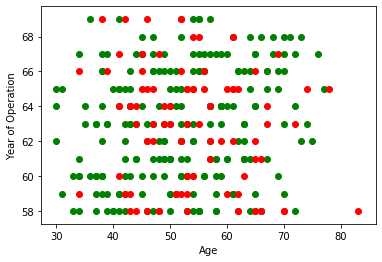

In [103]:
plt.scatter(x = survived_data['age'],y = survived_data['year_of_operation'],c = 'green')
plt.scatter(x = not_survived_data['age'],y =not_survived_data['year_of_operation'],c = 'red')
plt.xlabel('Age');
plt.ylabel('Year of Operation');

In [104]:
# cluster these Survived and Not Survived using the KNN Algorithm 

x = haberman_data.drop(['survival'],axis=1)
y = haberman_data.survival

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [105]:
# Scaling the variables!
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

kncls = KNeighborsClassifier(n_neighbors = 2,metric = 'euclidean',p=1)
kncls.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [107]:
#make predictions
y_pred = kncls.predict(x_test)

In [108]:
# accuracy
accuracy_score(y_test,y_pred)

0.6451612903225806

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.95      0.76        37
           2       0.71      0.20      0.31        25

    accuracy                           0.65        62
   macro avg       0.68      0.57      0.54        62
weighted avg       0.67      0.65      0.58        62

